### practice1

In [1]:
#sympy
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import symbols

In [2]:
t_val = np.linspace(0, 6, 100)

In [3]:
t = symbols('t')
position = sp.Pow(t,3) - 6*sp.Pow(t,2) - 15*t + 40
position

t**3 - 6*t**2 - 15*t + 40

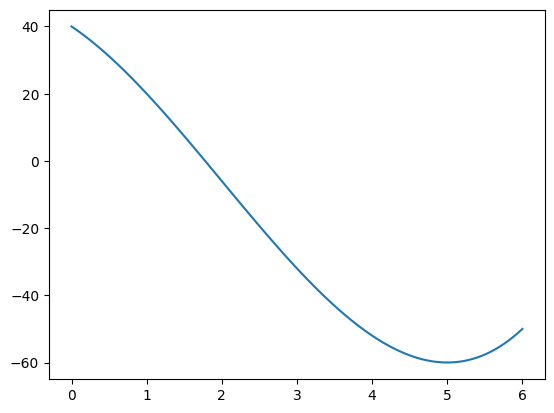

In [4]:
p_val = []
p_val = np.array([position.subs(t, t_unit) for t_unit in t_val])
plt.plot(t_val, p_val)
plt.show()

In [5]:
velocity = sp.diff(position, t)
velocity

3*t**2 - 12*t - 15

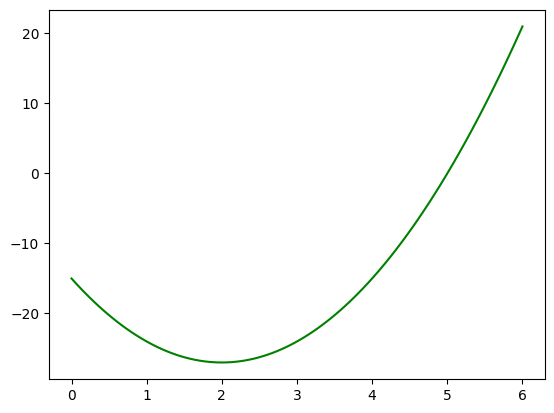

In [6]:
v_val = np.array([velocity.subs(t, t_unit) for t_unit in t_val])
plt.plot(t_val, v_val,color='g')
plt.show()

In [7]:
accel = sp.diff(velocity, t)
accel

6*t - 12

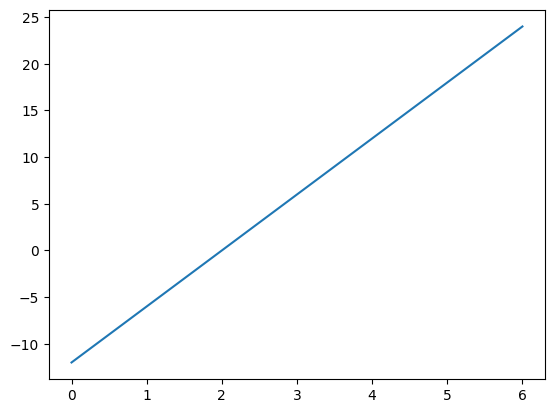

In [8]:
a_val = np.array([accel.subs(t,t_unit) for t_unit in t_val])
plt.plot(t_val, a_val)
plt.show()

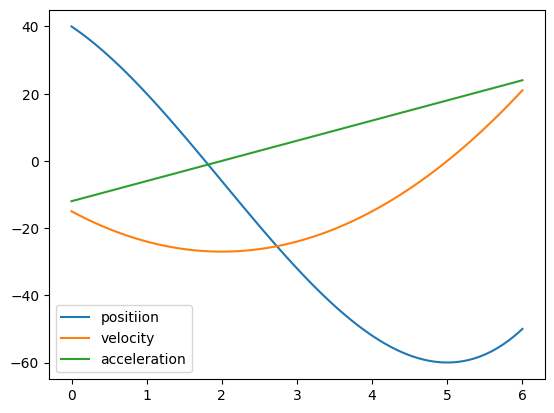

In [9]:
plt.plot(t_val, p_val, label='positiion')
plt.plot(t_val, v_val, label='velocity')
plt.plot(t_val, a_val, label='acceleration')
plt.legend()
plt.show()

In [10]:
##tensorflow
def position(t):
    return tf.math.pow(t, 3) - 6*tf.math.pow(t,2) - 15*tf.math.pow(t,1) + 40


In [11]:
with tf.GradientTape(persistent=True) as tape:
    t_tf = tf.constant(t_val)
    tape.watch(t_tf)
    p_val = position(t_tf)
    v_val = tape.gradient(p_val, t_tf)
a_val = tape.gradient(v_val, t_tf)

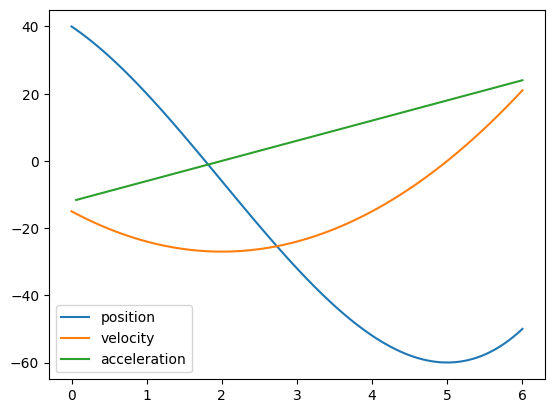

In [12]:
plt.plot(t_val, p_val, label='position')
plt.plot(t_val, v_val, label='velocity')
plt.plot(t_val, a_val, label='acceleration')
plt.legend()
plt.show()

###practice2 - Using Symbolic Python(sympy)



In [13]:
#import libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
t_val = np.linspace(0,6,100)
t = sp.symbols('t')
#set initial values
v0 = 10
y0 = 20

accel = -9.81
velocity = sp.integrate(accel, t)
velocity = velocity - velocity.subs(t,0) + 10
accel = sp.diff(velocity, t)
print(f'velocity : {velocity}')
print(f'acceleration : {accel:.2f}')

velocity : 10 - 9.81*t
acceleration : -9.81


In [15]:
position = sp.integrate(velocity, t)
position = position - position.subs(t,0) + 20
position

-4.905*t**2 + 10.0*t + 20

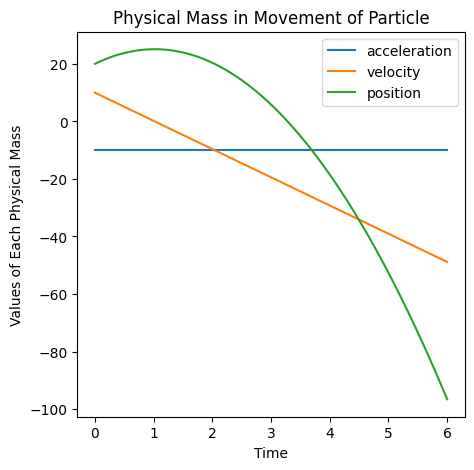

In [16]:
p_val = np.array([position.subs(t, t_unit) for t_unit in t_val])
v_val = np.array([velocity.subs(t, t_unit) for t_unit in t_val])
a_val = np.array([accel.subs(t, t_unit) for t_unit in t_val])

plt.figure(figsize=(5,5))
plt.plot(t_val,a_val,label='acceleration')
plt.plot(t_val,v_val, label='velocity')
plt.plot(t_val,p_val, label='position')
plt.title('Physical Mass in Movement of Particle')
plt.xlabel('Time')
plt.ylabel('Values of Each Physical Mass')
plt.legend()
plt.show()

###Practice2 - Using Numerical Intergration Algorithm
         

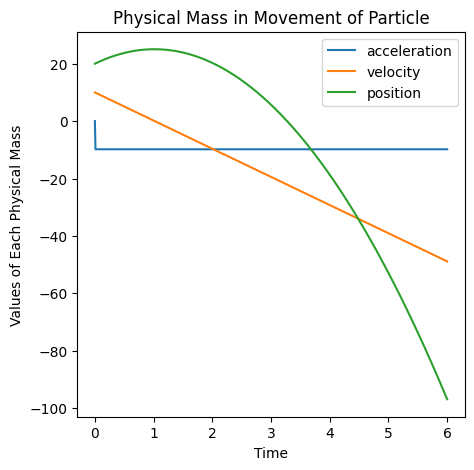

In [17]:
t = [0]
dt = 0.01
# accel = -9.81

#Set Initial Condition
v0 = 10
y0 = 20
v_val = [v0]
y_val = [y0]
a_val = [0]

# module : acceleration of particle, paramater : t, return : -9.81
def accel(t):
    return -9.81

for _ in range(600):
    t.append(t[-1]+dt)
    a_val.append(accel(t[-1]))
    v_val.append(v_val[-1] + accel(t[-1])*dt)
    y_val.append(y_val[-1] + v_val[-1]*dt)

plt.figure(figsize=(5,5))
plt.plot(t,a_val,label='acceleration')
plt.plot(t,v_val, label='velocity')
plt.plot(t,y_val, label='position')
plt.title('Physical Mass in Movement of Particle')
plt.xlabel('Time')
plt.ylabel('Values of Each Physical Mass')
plt.legend()
plt.show()